In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf
import datetime as dt
from technical_generator import Generator

In [51]:
# Define the start and end dates for the data retrieval
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2023, 4, 4)
data = yf.download('AMZN', start, end)

[*********************100%***********************]  1 of 1 completed


In [52]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


In [53]:
data['pct_change'] = (data['Close'] - data['Close'].shift(1))/ data['Close'].shift(1)
data['log_change'] = np.log(data['Close']/ data['Close'].shift(1))

In [54]:
import technical_generator
Generator = technical_generator.Generator()

In [55]:
# Add a new columns for the 7, 14 and 21 day exponential moving average (EMA) of the 'Close' price
data['7ma'] = Generator.EMA(data['Close'], 7)
data['14ma'] = Generator.EMA(data['Close'], 14)
data['21ma'] = Generator.EMA(data['Close'], 21)

# Add a new columns for the 7, 14 and 21 day Moving Average Convergence Divergence (MACD) of the 'Close' price
data['7macd'] = Generator.MACD(data['Close'], 3, 11, 7)
data['14macd'] = Generator.MACD(data['Close'], 7, 21, 14)

# Add a new columns for the 7, 14 and 21 day Relative Strength Index (RSI) of the 'Close' price
data['7rsi'] = Generator.RSI(data['Close'], 7)
data['14rsi'] = Generator.RSI(data['Close'], 14)
data['21rsi'] = Generator.RSI(data['Close'], 21)

# Add a new columns for Average True Range (ATR) based on the 'High' and 'Low' prices
data['7atr'] = Generator.atr(data['High'], data['Low'], 7)
data['14atr'] = Generator.atr(data['High'], data['Low'], 14)
data['21atr'] = Generator.atr(data['High'], data['Low'], 21)

# Add a new columns for the upper and lower Bollinger Bands based on the 'Close' price and a window of 7, 14 and 21 days
data['7upper'], data['7lower'] = Generator.bollinger_band(data['Close'], 7)
data['14upper'], data['14lower'] = Generator.bollinger_band(data['Close'], 14)
data['21upper'], data['21lower'] = Generator.bollinger_band(data['Close'], 21)

# Add a new columns for the 7, 14 and 21 day Relative Strength Value (RSV)
data['7rsv'] = Generator.rsv(data['Close'], 7)
data['14rsv'] = Generator.rsv(data['Close'], 14)
data['21rsv'] = Generator.rsv(data['Close'], 21)

The RSV values are used in technical analysis to identify overbought and oversold conditions in a security. A value of 100 indicates that the security has closed at the highest price over the given time period, while a value of 0 indicates that it has closed at the lowest price over the period. A reading above 70 is typically considered overbought, while a reading below 30 is considered oversold.

In [56]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,21atr,7upper,7lower,14upper,14lower,21upper,21lower,7rsv,14rsv,21rsv
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000,NaN,NaN,6.695000,6.695000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000,0.005900,0.005883,6.717571,6.716161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000,-0.018116,-0.018282,6.672135,6.676562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000,-0.017013,-0.017160,6.609183,6.622547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000,0.027077,0.026717,6.631085,6.636493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


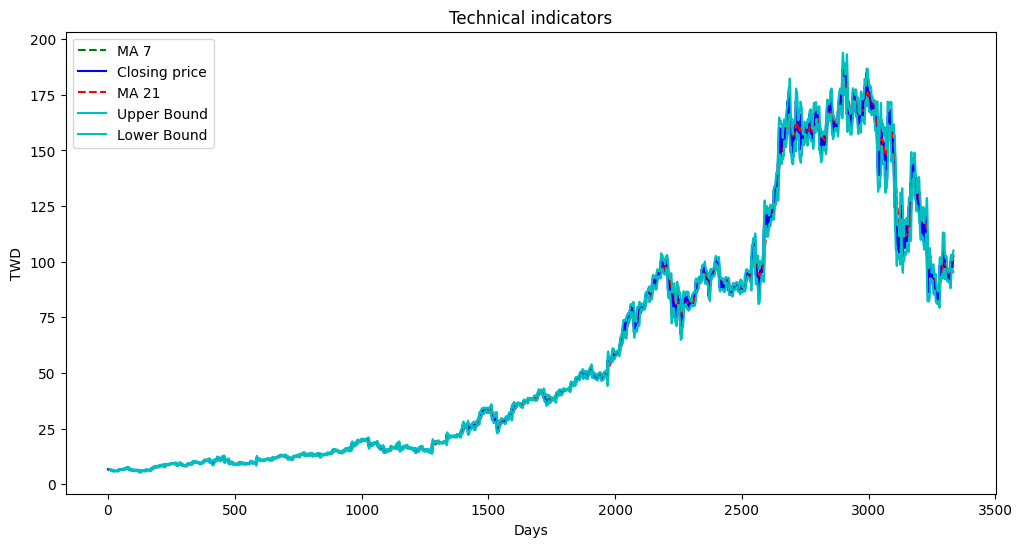

In [57]:
x_ = np.arange(data.shape[0])
plt.figure(figsize=(12, 6))
plt.plot(data['7ma'].values, label = 'MA 7', color = 'g', linestyle = '--')
plt.plot(data['Close'].values, label = 'Closing price', color = 'b')
plt.plot(data['21ma'].values, label = 'MA 21', color = 'r', linestyle = '--')
plt.plot(data['7upper'].values, label = 'Upper Bound', color = 'c')
plt.plot(data['7lower'].values, label = 'Lower Bound', color = 'c')
plt.fill_between(x_, data['7lower'].values, data['7upper'].values, alpha = 0.35)
plt.title('Technical indicators')
plt.ylabel('TWD')
plt.xlabel('Days')
plt.legend()

c:\Anaconda3\envs\AmazonStockPriceForecastingEnvironment\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


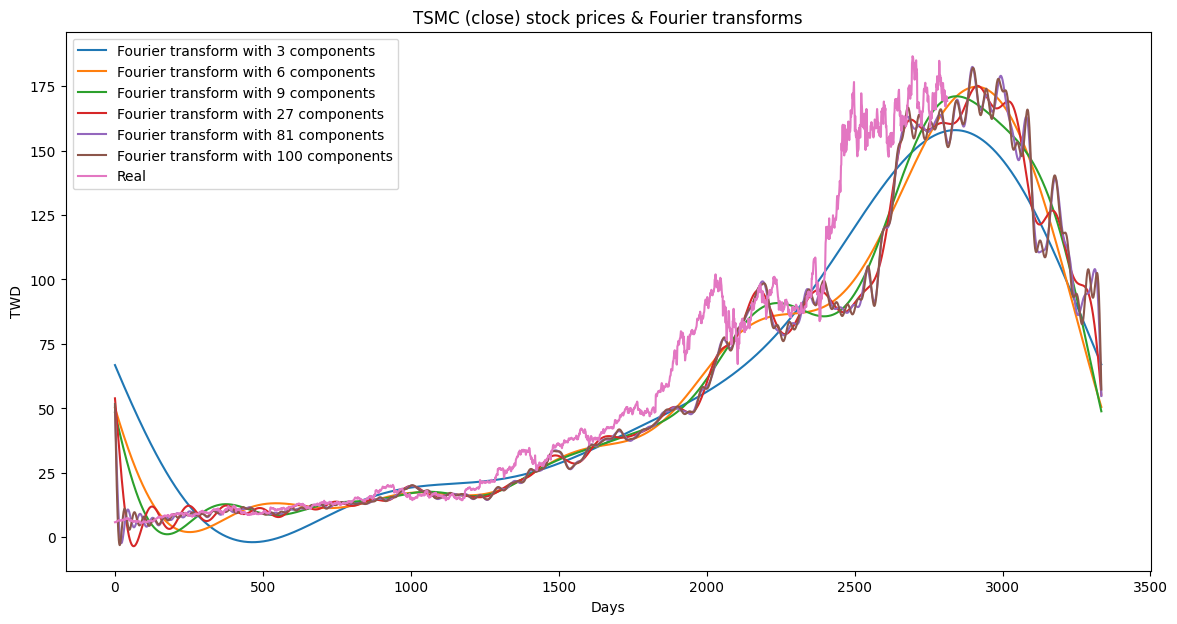

In [58]:
# Compute the fast Fourier transform of the 'Close' column 
close_fft = np.fft.fft(np.asarray(data['Close'].tolist()))

# Create a DataFrame with the Fourier transformed values, their absolute values, and angles
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

# Create a figure for plotting the Fourier transforms
plt.figure(figsize=(14, 7), dpi=100)

# Convert the Fourier transformed values to an array
fft_list = np.asarray(fft_df['fft'].tolist())

# Iterate over a list of integers representing the number of components to keep in the Fourier transform
for num_ in [3, 6, 9, 27, 81, 100]:
    fft_list_m10= np.copy(fft_list); # Create a copy of the Fourier transformed values
    fft_list_m10[num_:-num_] = 0 # Set all but the first and last num_ values in fft_list_m10 to zero
    data[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10) # Compute the inverse Fourier transform of fft_list_m10 and store it in a new column in data_combine 
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_)) # Plot the inverse Fourier transform with a label indicating the number of components kept

# Plot the actual 'Close' values from data_combine
plt.plot(data_combine['Close'].values,  label='Real')
# Set the labels and title of the plot, and show the legend
plt.xlabel('Days')
plt.ylabel('TWD')
plt.title('TSMC (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [59]:
data['FT_3components'] = data['FT_3components'].astype('float')
data['FT_6components'] = data['FT_6components'].astype('float')
data['FT_9components'] = data['FT_9components'].astype('float')
data['FT_27components'] = data['FT_27components'].astype('float')
data['FT_81components'] = data['FT_81components'].astype('float')
data['FT_100components'] = data['FT_100components'].astype('float')
data.head()

c:\Anaconda3\envs\AmazonStockPriceForecastingEnvironment\lib\site-packages\pandas\core\dtypes\cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,21lower,7rsv,14rsv,21rsv,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000,NaN,NaN,6.695000,6.695000,...,NaN,NaN,NaN,NaN,66.793522,50.193968,48.359400,53.895564,50.741649,51.699533
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000,0.005900,0.005883,6.717571,6.716161,...,NaN,NaN,NaN,NaN,66.521917,49.814025,47.852070,52.506692,46.681271,46.062446
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000,-0.018116,-0.018282,6.672135,6.676562,...,NaN,NaN,NaN,NaN,66.250508,49.435137,47.346233,51.110480,42.640874,40.471992
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000,-0.017013,-0.017160,6.609183,6.622547,...,NaN,NaN,NaN,NaN,65.979299,49.057314,46.841923,49.708200,38.647976,35.000315
2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000,0.027077,0.026717,6.631085,6.636493,...,NaN,NaN,NaN,NaN,65.708294,48.680566,46.339174,48.301138,34.729693,29.716822


In [60]:
data.to_csv('data.csv')